In this session, we will build a 3-classes classification by using the "iris flower" dataset. This is a multivariate data set introduced by Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.



## Step 1: prepare and explore your dataset

In [4]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc,roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

%matplotlib inline



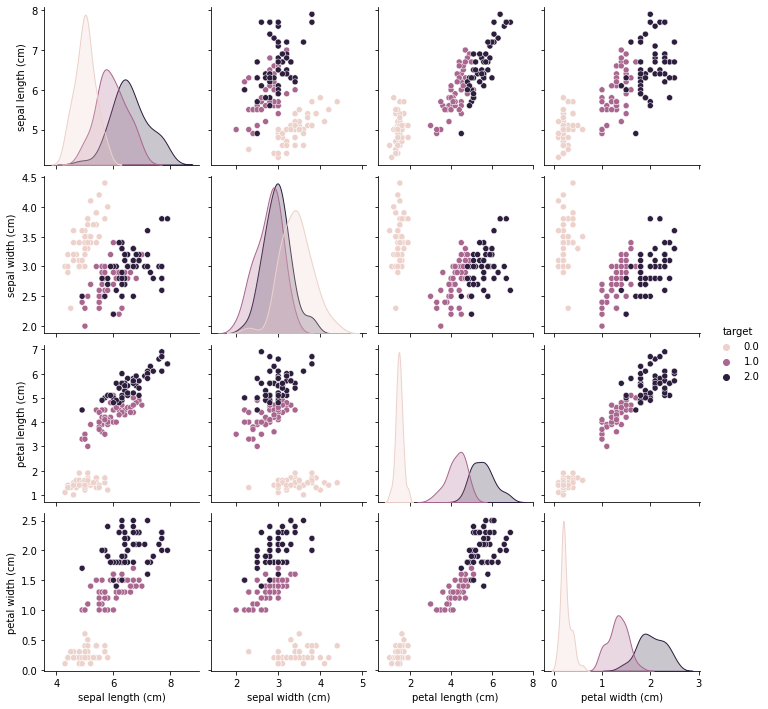

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

sns.pairplot(df,hue='target')


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25, random_state=1)

#normalize data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


## Step 2: define kernels to transform the data to a higher dimension

In [7]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [8]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train,test_size=0.15)
for i in range(4):
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train1, y_train1)
    y_pred = svclassifier.predict(X_test1)
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test1,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         6
           2       0.24      1.00      0.38         4

    accuracy                           0.24        17
   macro avg       0.08      0.33      0.13        17
weighted avg       0.06      0.24      0.09        17

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
clf1 = SVC(kernel='poly', degree=8, gamma="auto")
clf2 = SVC(kernel='linear', gamma="auto")
clf3 = SVC(kernel='rbf', gamma="auto")
clf4=SVC(kernel='sigmoid', gamma="auto")

plt.subplots(figsize=(10, 8))
count = 1

# title for the plots
titles = (
    "SVC with polynomial (degree 8) kernel"
    "SVC with linear kernel",
    "SVC with RBF kernel",
    "SVC with sigmoid kernel",
)

for clf, lab in zip([clf1, clf2, clf3, clf4],titles):

    clf.fit(X_train[:, :2], y_train)
    plt.subplot(2,2,count)
    fig = plot_decision_regions(X=X_train[:, :2], y=y_train, clf=clf, legend=2)
    plt.title(lab)
    count+=1

plt.show()




## Step 3: create a GridSearchCV object and fit it to the training data

In [10]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
kernels = ['linear','rbf', 'poly', 'sigmoid']
param_grid = dict(gamma=gamma_range, C=C_range, kernel=kernels)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(probability = True), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)

The best parameters are {'C': 100000000.0, 'gamma': 1e-06, 'kernel': 'rbf'} with a score of 0.97


## Step 4: predict the outcomes for the test set

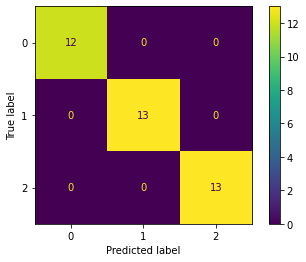

In [11]:
grid_predictions = grid.predict(X_test)

#Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, grid_predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

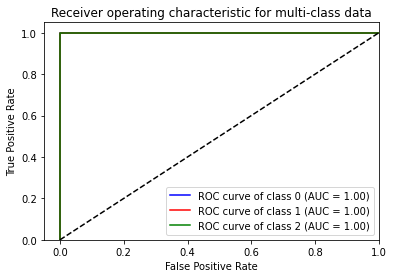

In [12]:
y_score = grid.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
from itertools import cycle
y_test1 = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test1.shape[1]


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()



## Step 5: compare different ML models

In [13]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

models = []
#models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf')))

seed=10

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.946970 (0.057196)
SVM: 0.957576 (0.077273)


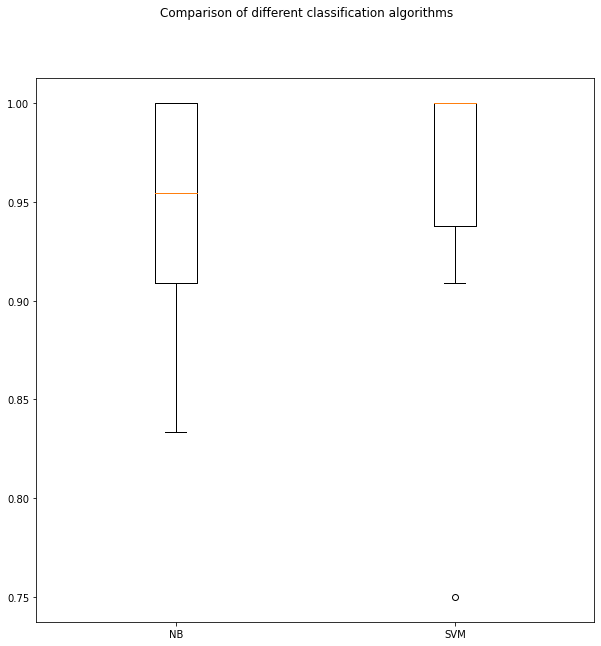

In [14]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of different classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

[[4.22659852e-138 4.26803608e-002 9.57319639e-001]
 [1.00000000e+000 1.52901562e-016 3.88682138e-025]
 [1.00000000e+000 3.53084578e-017 1.14635695e-025]
 [1.00000000e+000 3.05943833e-016 7.89619432e-025]
 [1.80725020e-031 9.99999969e-001 3.09384234e-008]
 [1.00000000e+000 9.62013140e-017 1.42453634e-025]
 [5.07736072e-066 9.99936576e-001 6.34243384e-005]
 [6.18742578e-098 9.95542892e-001 4.45710760e-003]
 [1.00000000e+000 4.62973761e-017 4.20248712e-026]
 [1.12031910e-088 9.91606679e-001 8.39332100e-003]
 [8.07302390e-200 5.40946745e-007 9.99999459e-001]
 [1.41312445e-121 1.65452212e-001 8.34547788e-001]
 [5.00872605e-133 4.73717448e-002 9.52628255e-001]
 [2.53845849e-095 9.52509338e-001 4.74906623e-002]
 [1.27760472e-173 4.38146331e-006 9.99995619e-001]
 [9.55072841e-100 8.64163433e-001 1.35836567e-001]
 [5.38851698e-174 7.65286808e-007 9.99999235e-001]
 [1.47151270e-084 9.98370869e-001 1.62913059e-003]
 [1.39586410e-091 9.96582433e-001 3.41756683e-003]
 [4.26823092e-088 9.96008310e-0

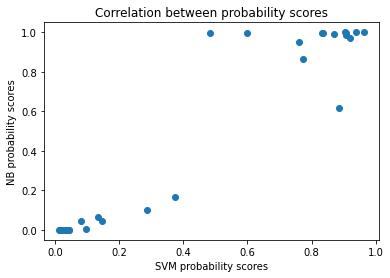

In [22]:
model = GaussianNB()

model.fit(X_train,y_train)
y_score_NB = model.predict_proba(X_test)
print(y_score_NB)
plt.scatter(y_score[:,1], y_score_NB[:,1])
plt.xlabel('SVM probability scores')
plt.ylabel('NB probability scores')
plt.title('Correlation between probability scores')

plt.show()
